In [ ]:
#Upload test images
from google.colab import files
testimage = files.upload()

Saving squatimage.jpg to squatimage.jpg


In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.3 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [ ]:
def angle_btn_3points(p1,p2,p3):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    radians = np.arctan2(p3[1]-p2[1], p3[0]-p2[0]) - np.arctan2(p1[1]-p2[1], p1[0]-p2[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle >180.0:
        angle = 360-angle
    return angle

In [ ]:
def detect_squat(cL, cR, dL, dR):
    # if cL>150 and cR>150 and dL>150 and dR>150:
    #     res = "Output: Stand"
    if cL<130 and cR<130 and dL<130 and dR<130:
        res = "Correct"
    else:
        res = "Incorrect"
    return res

Text(0.5, 1.0, 'Sample Image')

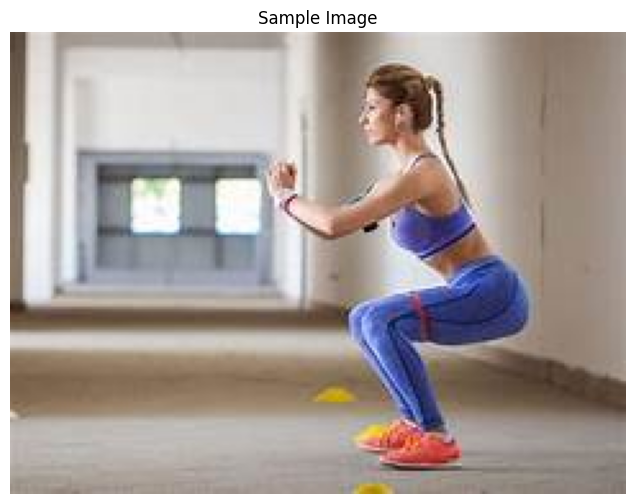

In [ ]:
for name in testimage.keys():
  img = cv2.imread(name)

plt.figure(figsize=((8,6)))
plt.imshow(np.flip(img,(2)))
plt.axis('off')
plt.title('Sample Image')

In [ ]:
def test_image(image):
    # img = cv2.imread(image)
    # # img = cv2.imread(image)
    # img = cv2.resize(img,(480,640))
    # image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Keypoints detection
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Extracting the landmarks
    try:
        landmarks = results.pose_landmarks.landmark
        kp = mp_pose.PoseLandmark

        # Get coordinates and angle (Left Elbow angle)
        p1 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p2 = [landmarks[kp.LEFT_ELBOW.value].x,landmarks[kp.LEFT_ELBOW.value].y]
        p3 = [landmarks[kp.LEFT_WRIST.value].x,landmarks[kp.LEFT_WRIST.value].y]
        AL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Elbow angle)
        p1 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p2 = [landmarks[kp.RIGHT_ELBOW.value].x,landmarks[kp.RIGHT_ELBOW.value].y]
        p3 = [landmarks[kp.RIGHT_WRIST.value].x,landmarks[kp.RIGHT_WRIST.value].y]
        AR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle(Left Shoulder angle)
        p1 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p2 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p3 = [landmarks[kp.LEFT_ELBOW.value].x,landmarks[kp.LEFT_ELBOW.value].y]
        BL = angle_btn_3points(p1, p2, p3)

        # Get coordinates (Right Shoulder angle)
        p1 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p2 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p3 = [landmarks[kp.RIGHT_ELBOW.value].x,landmarks[kp.RIGHT_ELBOW.value].y]
        BR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Left Hip angle)
        p1 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p2 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p3 = [landmarks[kp.LEFT_KNEE.value].x,landmarks[kp.LEFT_KNEE.value].y]
        CL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Hip angle)
        p1 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p2 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p3 = [landmarks[kp.RIGHT_KNEE.value].x,landmarks[kp.RIGHT_KNEE.value].y]
        CR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Left Knee angle)
        p1 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p2 = [landmarks[kp.LEFT_KNEE.value].x,landmarks[kp.LEFT_KNEE.value].y]
        p3 = [landmarks[kp.LEFT_ANKLE.value].x,landmarks[kp.LEFT_ANKLE.value].y]
        DL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Knee angle)
        p1 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p2 = [landmarks[kp.RIGHT_KNEE.value].x,landmarks[kp.RIGHT_KNEE.value].y]
        p3 = [landmarks[kp.RIGHT_ANKLE.value].x,landmarks[kp.RIGHT_ANKLE.value].y]
        DR = angle_btn_3points(p1, p2, p3)

        # Squat Detection
        status = detect_squat(CL, CR, DL, DR)



        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(0,255,255), thickness=2, circle_radius=2),
                            mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2)
                             )
        # Output Status
        cv2.putText(image, status, (350,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
        cv2.putText(image, status2, (20,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, status3, (20,120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
    except:
        print("exception")
        pass

    return np.flip(image,(2))

exception


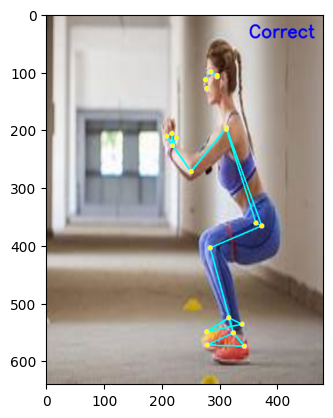

In [ ]:
for name in testimage.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  output = test_image(image)
  plt.imshow(output)